Slowly Rising Pulse Stimulation
===============================

A slowly rising pulse can help in triggering small diameter axon first. This script illustrates this phenomenon, with a constant stimulus, small diameter trigger a spike while larger axons are not depolarized sufficiently. 

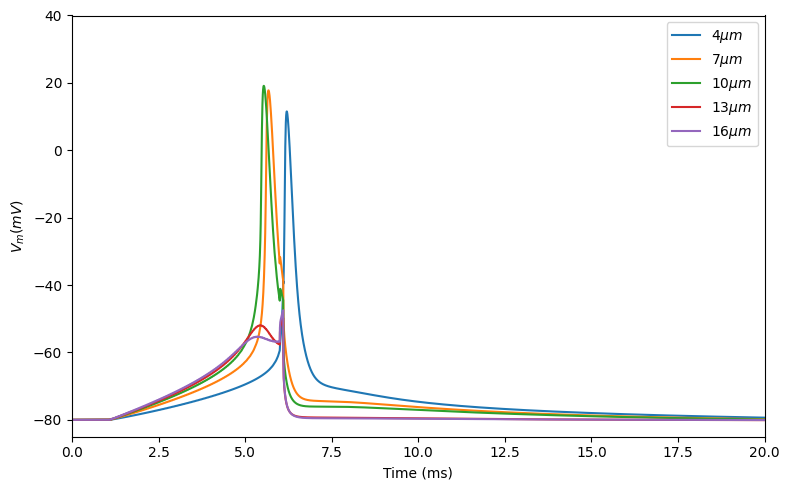

In [5]:
import nrv
import numpy as np
import matplotlib.pyplot as plt

model = 'MRG'
diams = [4, 7,  10, 13, 16]
Vm = []
y = 0
z = 0
n_node = 20

t_sim = 20
t_start = 1
prep_d = 5
prep_a = 35
interp_delay = 0
pw = 100e-3
amp = 48

prepulse = nrv.stimulus()

slope = prep_a/prep_d
prepulse.ramp(slope, t_start, prep_d+t_start, 0.05)
pulse = nrv.stimulus()
pulse.biphasic_pulse(t_start+prep_d,amp,pw,0,0)
stim_1 = -prepulse+pulse
stim_1.s[-2] = -amp
stim_1.s[-1] = 0

nseg = 1
material = nrv.load_material('endoneurium_bhadra')


for diam in diams:
    L=nrv.get_length_from_nodes(diam,n_node)
    axon = nrv.myelinated(y,z,diam,L,rec='nodes',dt=0.005,Nseg_per_sec=nseg,model=model) 

    y_elec = 500
    z_elec = 0
    x_elec = axon.x_nodes[np.int32(n_node/2)]	# electrode y position, in [um]
    E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)

    #stim_1 = pulse
    stim_extra = nrv.stimulation(material)
    stim_extra.add_electrode(E1,stim_1)
    axon.attach_extracellular_stimulation(stim_extra)

    #axon1.insert_I_Clamp(t_position, t_start, t_duration, t_amplitude)       

    # extra-cellular stimulation

    # simulate axon activity
    results = axon.simulate(t_sim=t_sim)#,footprints = footprints)
    Vm.append(results['V_mem'][10])


plt.figure(figsize=(8,5))
for i in range(len(diams)):
    plt.plot(results['t'],Vm[i], label=f"{diams[i]}µm")
plt.ylabel(r"$V_m (mV)$")
plt.xlabel("Time (ms)")
plt.legend()

plt.xlim(np.min(results['t']),np.max(results['t']))
plt.ylim(-85,40)
plt.tight_layout()
#plt.show()
